# Capstone Project Report

## We will be looking at some trending places in Toronto

###### A famous restaurant chain, headquartered in London, had slowly expanded their arms to various untouched cities in Europe and with time they have grown up quite significantly, instead of opening new restaurant, the companies believe in collaboration.

###### They had already collaborated with major local players in approximately 34 cities in western Europe, and the company is making high revenue out of it. One peculiar thing about the company is that they not only invest in other restaurant or eating joints, they also collaborate with cafes, regional snack centre and other places where people go for an experience.

###### The company wants to expand its boundary and this time they have their eye on Toronto. The company is looking forward for major experience and food players also they are looking forward for some trending places in Toronto.


In [58]:
#Importing required Libraries 

import numpy as np 

import pandas as pd
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import json

from geopy.geocoders import Nominatim

import requests
from pandas.io.json import json_normalize

import matplotlib as mpl
import matplotlib.cm as cm
import matplotlib.colors as colors
import matplotlib.pyplot as plt
mpl.style.use('ggplot')

from sklearn.cluster import KMeans

import folium

#### DATA LOADING 

In [59]:
Toronto_data = pd.read_csv("C:/Users/Sahil/Desktop/places.csv")
Toronto_data

,Places,Latitude,Longitude
0,East Toronto,43.740571,-79.315266
1,West Toronto,43.665612,-79.471215
2,North Toronto,43.706400,-79.404222
3,South Toronto,43.677616,-79.377684
4,Central Toronto,43.657921,-79.421661


#### DATA ON MAP

In [92]:
address = 'Toronto, Canada'

geolocator = Nominatim(user_agent="my-application")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geographical coordinate of Toronto are {}, {}.'.format(latitude, longitude))

The geographical coordinate of Toronto are 43.653963, -79.387207.


In [94]:
map_Toronto = folium.Map(location=[latitude, longitude], zoom_start=12)

# add markers to map
for lat, lng, label in zip(Toronto_data['Latitude'], Toronto_data['Longitude'], Toronto_data['Places']):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=10,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_Toronto)  
    
map_Toronto

#### LOADING FOURSQUARE DATA

In [62]:
#Define Foursquare Credentials and Version
CLIENT_ID = 'B35WRI1RWTO2PU03OVWJQVDIHZOGQYRIHWOQFKRLFGIG24SP' # your Foursquare ID
CLIENT_SECRET = 'U3B2ZXPCPX10VY1A0P3OFVWIKKFF4BJZCULO2A3QVSNOXSAG' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: B35WRI1RWTO2PU03OVWJQVDIHZOGQYRIHWOQFKRLFGIG24SP
CLIENT_SECRET:U3B2ZXPCPX10VY1A0P3OFVWIKKFF4BJZCULO2A3QVSNOXSAG


In [63]:
def getNearbyVenues(names, latitudes, longitudes, radius=500, LIMIT=200):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng,            
            v['venue']['name'], 
            v['venue']['id'],
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Places', 
                  'Places Latitude', 
                  'Places Longitude', 
                  'Venue',
                  'Venue id',                
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category'
                             
                   ]
    
    return(nearby_venues)

 # PLACES

In [97]:
Toronto_data_venues = getNearbyVenues(names=Toronto_data['Places'],
                                   latitudes=Toronto_data['Latitude'],
                                   longitudes=Toronto_data['Longitude']
                                  )

Toronto_data_venues.head()

East Toronto
West Toronto
North Toronto
South Toronto
Central Toronto


,Places,Places Latitude,Places Longitude,Venue,Venue id,Venue Latitude,Venue Longitude,Venue Category
0,East Toronto,43.740571,-79.315266,Georgy Porgy's,4b2ffd70f964a52003f424e3,43.741668,-79.314625,American Restaurant
1,East Toronto,43.740571,-79.315266,Baskin Robbins,4de5655118389f0558613366,43.742158,-79.314141,Ice Cream Shop
2,East Toronto,43.740571,-79.315266,Damas Grillhouse & Juice Bar,4d0bf09d3bc0b60c7e5bd174,43.741839,-79.309296,Mediterranean Restaurant
3,East Toronto,43.740571,-79.315266,Shooters Snooker & Sports Club,4ddb3971922e1b86cddae4e9,43.742637,-79.313052,Pool Hall
4,East Toronto,43.740571,-79.315266,GoodLife Fitness North York Victoria Terrace,4b049809f964a520725522e3,43.742234,-79.313351,Gym


In [65]:
Toronto_data_venues.groupby('Places').count()
df_Toronto_histo = df_view_new['Venue Category']
df_Toronto_histo

Places
Central Toronto    23
East Toronto       17
North Toronto      44
South Toronto       4
West Toronto       56
Name: Venue Category, dtype: int64

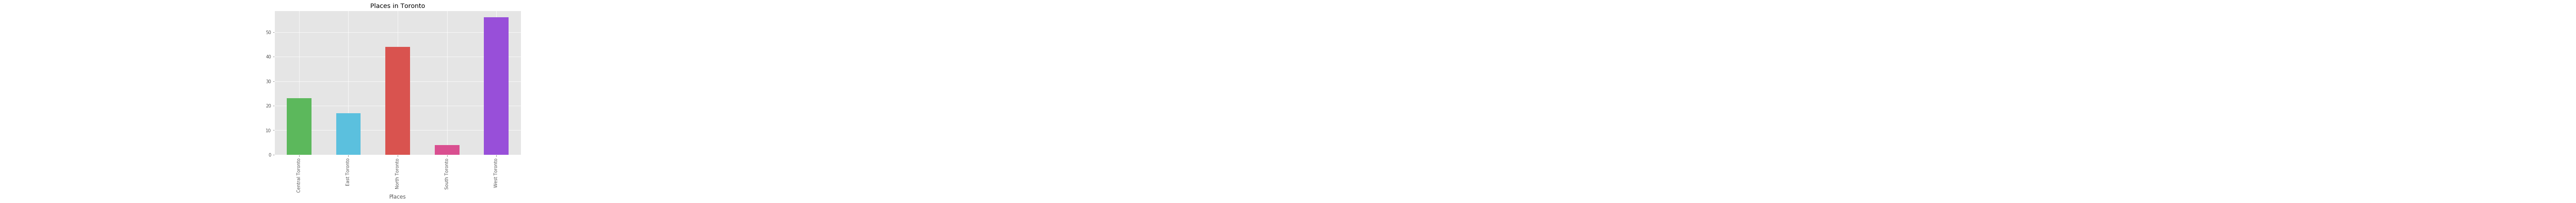

In [67]:
df_view_new = Toronto_data_venues.groupby('Places').count()
df_Toronto_bar = df_view_new['Venue Category']

df_Toronto_histo.plot(kind='bar', figsize=(10,6),colors=('#5cb85c','#5bc0de','#d9534f','#d94f90','#984fd9'))

plt.title('Places in Toronto') 

for index, value in enumerate(df_Toronto_histo): 
    label = format(int(value), ',') 
    plt.annotate(label, xy=(value - 10, index - 0.10), color='black')
    
plt.show()

### ANALYSIS

In [68]:
Toronto = pd.get_dummies(Toronto_data_venues[['Venue Category']], prefix="", prefix_sep="")

Toronto['Places'] = Toronto_data_venues['Places'] 


fixed_columns = [Toronto.columns[-1]] + list(Toronto.columns[:-1])
Toronto = Toronto[fixed_columns]

Toronto

,Places,American Restaurant,Antique Shop,Arts & Crafts Store,Asian Restaurant,Baby Store,Bakery,Bar,Baseball Field,Beer Store,Bookstore,Boutique,Breakfast Spot,Buffet,Building,Burger Joint,Café,Candy Store,Caribbean Restaurant,Chinese Restaurant,Clothing Store,Coffee Shop,Deli / Bodega,Dessert Shop,Diner,Discount Store,Electronics Store,Falafel Restaurant,Fast Food Restaurant,Flea Market,Food Truck,Fried Chicken Joint,Furniture / Home Store,Gastropub,Gay Bar,Grocery Store,Gym,Gym / Fitness Center,Gym Pool,Hardware Store,Home Service,Ice Cream Shop,Indian Restaurant,Intersection,Italian Restaurant,Japanese Restaurant,Liquor Store,Mediterranean Restaurant,Mexican Restaurant,Middle Eastern Restaurant,Movie Theater,Music Venue,Nail Salon,Nightclub,Park,Persian Restaurant,Pet Store,Pizza Place,Playground,Plaza,Pool Hall,Portuguese Restaurant,Poutine Place,Pub,Rental Car Location,Restaurant,Salad Place,Salon / Barbershop,Sandwich Place,Shopping Mall,Skating Rink,Smoothie Shop,Speakeasy,Sports Bar,Storage Facility,Supermarket,Sushi Restaurant,Tapas Restaurant,Thai Restaurant,Toy / Game Store,Trail,Vegetarian / Vegan Restaurant,Video Store,Vietnamese Restaurant,Whisky Bar,Women's Store,Yoga Studio
0,East Toronto,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,East Toronto,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,East Toronto,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,East Toronto,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,East Toronto,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5,East Toronto,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
6,East Toronto,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
7,East Toronto,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
8,East Toronto,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
9,East Toronto,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [69]:
Toronto = Toronto.groupby('Places').mean().reset_index()
Toronto

,Places,American Restaurant,Antique Shop,Arts & Crafts Store,Asian Restaurant,Baby Store,Bakery,Bar,Baseball Field,Beer Store,Bookstore,Boutique,Breakfast Spot,Buffet,Building,Burger Joint,Café,Candy Store,Caribbean Restaurant,Chinese Restaurant,Clothing Store,Coffee Shop,Deli / Bodega,Dessert Shop,Diner,Discount Store,Electronics Store,Falafel Restaurant,Fast Food Restaurant,Flea Market,Food Truck,Fried Chicken Joint,Furniture / Home Store,Gastropub,Gay Bar,Grocery Store,Gym,Gym / Fitness Center,Gym Pool,Hardware Store,Home Service,Ice Cream Shop,Indian Restaurant,Intersection,Italian Restaurant,Japanese Restaurant,Liquor Store,Mediterranean Restaurant,Mexican Restaurant,Middle Eastern Restaurant,Movie Theater,Music Venue,Nail Salon,Nightclub,Park,Persian Restaurant,Pet Store,Pizza Place,Playground,Plaza,Pool Hall,Portuguese Restaurant,Poutine Place,Pub,Rental Car Location,Restaurant,Salad Place,Salon / Barbershop,Sandwich Place,Shopping Mall,Skating Rink,Smoothie Shop,Speakeasy,Sports Bar,Storage Facility,Supermarket,Sushi Restaurant,Tapas Restaurant,Thai Restaurant,Toy / Game Store,Trail,Vegetarian / Vegan Restaurant,Video Store,Vietnamese Restaurant,Whisky Bar,Women's Store,Yoga Studio
0,Central Toronto,0.000000,0.000000,0.000000,0.000000,0.000000,0.043478,0.086957,0.000000,0.000000,0.043478,0.000000,0.086957,0.000000,0.00,0.000000,0.043478,0.043478,0.000000,0.000000,0.000000,0.043478,0.000000,0.086957,0.000000,0.000000,0.000000,0.043478,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.043478,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.043478,0.043478,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.043478,0.0,0.000000,0.043478,0.000000,0.000000,0.000000,0.000000,0.043478,0.000000,0.000000,0.000000,0.000000,0.000000,0.043478,0.000000,0.000000,0.000000,0.000000,0.000000,0.043478,0.000000,0.000000,0.000000,0.043478,0.000000,0.000000,0.00,0.043478,0.000000,0.000000,0.043478,0.000000,0.000000
1,East Toronto,0.058824,0.000000,0.000000,0.000000,0.058824,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.058824,0.000000,0.058824,0.058824,0.000000,0.000000,0.058824,0.000000,0.000000,0.000000,0.000000,0.000000,0.058824,0.000000,0.000000,0.000000,0.000000,0.058824,0.000000,0.000000,0.000000,0.058824,0.058824,0.058824,0.058824,0.000000,0.000000,0.000000,0.058824,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.058824,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.058824,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.058824,0.00,0.000000,0.000000,0.058824,0.000000,0.000000,0.000000
2,North Toronto,0.000000,0.000000,0.022727,0.022727,0.000000,0.022727,0.000000,0.022727,0.000000,0.045455,0.000000,0.022727,0.022727,0.00,0.022727,0.000000,0.022727,0.022727,0.000000,0.022727,0.113636,0.022727,0.000000,0.000000,0.000000,0.000000,0.000000,0.068182,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.045455,0.022727,0.022727,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.045455,0.022727,0.000000,0.000000,0.022727,0.022727,0.000000,0.000000,0.000000,0.0,0.022727,0.000000,0.045455,0.000000,0.022727,0.000000,0.000000,0.022727,0.022727,0.000000,0.022727,0.022727,0.000000,0.000000,0.022727,0.022727,0.022727,0.000000,0.000000,0.000000,0.022727,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.022727,0.000000,0.022727,0.000000
3,South Toronto,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.25,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000

In [70]:
num_top_venues = 10

for hood in Toronto['Places']:
    print("----"+hood+"----")
    temp = Toronto[Toronto['Places'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----Central Toronto----
                   venue  freq
0                    Bar  0.09
1           Dessert Shop  0.09
2         Breakfast Spot  0.09
3     Italian Restaurant  0.04
4              Pet Store  0.04
5     Salon / Barbershop  0.04
6                Gay Bar  0.04
7     Falafel Restaurant  0.04
8  Portuguese Restaurant  0.04
9             Sports Bar  0.04


----East Toronto----
                      venue  freq
0       American Restaurant  0.06
1        Chinese Restaurant  0.06
2  Mediterranean Restaurant  0.06
3              Intersection  0.06
4         Indian Restaurant  0.06
5            Ice Cream Shop  0.06
6              Home Service  0.06
7                       Gym  0.06
8                 Pool Hall  0.06
9       Fried Chicken Joint  0.06


----North Toronto----
                  venue  freq
0           Coffee Shop  0.11
1  Fast Food Restaurant  0.07
2           Pizza Place  0.05
3   Japanese Restaurant  0.05
4             Bookstore  0.05
5                   Gym  0.05
6   

In [78]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

num_top_venues = 10
indicators = ['st', 'nd', 'rd']
columns = ['Places']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

Places_venues_sorted = pd.DataFrame(columns=columns)
Places_venues_sorted['Places'] = Toronto['Places']

for ind in np.arange(Toronto.shape[0]):
    Places_venues_sorted.iloc[ind, 1:] = return_most_common_venues(Toronto.iloc[ind, :], num_top_venues)

Places_venues_sorted

,Places,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Central Toronto,Dessert Shop,Breakfast Spot,Bar,Pet Store,Candy Store,Salon / Barbershop,Falafel Restaurant,Portuguese Restaurant,Bookstore,Sports Bar
1,East Toronto,Intersection,Sandwich Place,Baby Store,Chinese Restaurant,Coffee Shop,Deli / Bodega,Discount Store,Fried Chicken Joint,Gym,Home Service
2,North Toronto,Coffee Shop,Fast Food Restaurant,Japanese Restaurant,Gym,Bookstore,Pizza Place,Caribbean Restaurant,Burger Joint,Pub,Poutine Place
3,South Toronto,Park,Trail,Building,Yoga Studio,Fried Chicken Joint,Diner,Discount Store,Electronics Store,Falafel Restaurant,Fast Food Restaurant
4,West Toronto,Bar,Coffee Shop,Italian Restaurant,Café,Thai Restaurant,Nail Salon,Bakery,Grocery Store,Antique Shop,Arts & Crafts Store


#### Clustering

In [91]:
kclusters = 5

Toronto_grouped_clustering = Toronto.drop('Places', 1)

kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(Toronto_grouped_clustering)

kmeans.labels_[0:10]

array([3, 2, 4, 1, 0])

In [83]:
Toronto_merged = Toronto_data

# add clustering labels
Toronto_merged['Cluster Labels'] = kmeans.labels_

Toronto_merged = Toronto_merged.join(Places_venues_sorted.set_index('Places'), on='Places')
Toronto_merged 


,Places,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,East Toronto,43.740571,-79.315266,3,Intersection,Sandwich Place,Baby Store,Chinese Restaurant,Coffee Shop,Deli / Bodega,Discount Store,Fried Chicken Joint,Gym,Home Service
1,West Toronto,43.665612,-79.471215,2,Bar,Coffee Shop,Italian Restaurant,Café,Thai Restaurant,Nail Salon,Bakery,Grocery Store,Antique Shop,Arts & Crafts Store
2,North Toronto,43.706400,-79.404222,4,Coffee Shop,Fast Food Restaurant,Japanese Restaurant,Gym,Bookstore,Pizza Place,Caribbean Restaurant,Burger Joint,Pub,Poutine Place
3,South Toronto,43.677616,-79.377684,1,Park,Trail,Building,Yoga Studio,Fried Chicken Joint,Diner,Discount Store,Electronics Store,Falafel Restaurant,Fast Food Restaurant
4,Central Toronto,43.657921,-79.421661,0,Dessert Shop,Breakfast Spot,Bar,Pet Store,Candy Store,Salon / Barbershop,Falafel Restaurant,Portuguese Restaurant,Bookstore,Sports Bar


In [84]:
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=13)


x = np.arange(kclusters)
ys = [i+x+(i*x)**3 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(Toronto_merged['Latitude'], Toronto_merged['Longitude'], Toronto_merged['Places'], Toronto_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=20,
        popup=label,
        color='black',
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

EAST TORONTO


In [85]:

Toronto_merged.loc[Toronto_merged['Cluster Labels'] == 0, Toronto_merged.columns[[1] + list(range(5, Toronto_merged.shape[1]))]]

,Latitude,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
4,43.657921,Breakfast Spot,Bar,Pet Store,Candy Store,Salon / Barbershop,Falafel Restaurant,Portuguese Restaurant,Bookstore,Sports Bar


WEST TORONTO

In [87]:

Toronto_merged.loc[Toronto_merged['Cluster Labels'] == 1, Toronto_merged.columns[[1] + list(range(5, Toronto_merged.shape[1]))]]

,Latitude,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
3,43.677616,Trail,Building,Yoga Studio,Fried Chicken Joint,Diner,Discount Store,Electronics Store,Falafel Restaurant,Fast Food Restaurant


NORTH TORONTO

In [88]:

Toronto_merged.loc[Toronto_merged['Cluster Labels'] == 2, Toronto_merged.columns[[1] + list(range(5, Toronto_merged.shape[1]))]]

,Latitude,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
1,43.665612,Coffee Shop,Italian Restaurant,Café,Thai Restaurant,Nail Salon,Bakery,Grocery Store,Antique Shop,Arts & Crafts Store


SOUTH TORONTO

In [89]:

Toronto_merged.loc[Toronto_merged['Cluster Labels'] == 3, Toronto_merged.columns[[1] + list(range(5, Toronto_merged.shape[1]))]]

,Latitude,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,43.740571,Sandwich Place,Baby Store,Chinese Restaurant,Coffee Shop,Deli / Bodega,Discount Store,Fried Chicken Joint,Gym,Home Service


WEST TORONTO

In [90]:

Toronto_merged.loc[Toronto_merged['Cluster Labels'] == 4, Toronto_merged.columns[[1] + list(range(5, Toronto_merged.shape[1]))]]

,Latitude,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
2,43.7064,Fast Food Restaurant,Japanese Restaurant,Gym,Bookstore,Pizza Place,Caribbean Restaurant,Burger Joint,Pub,Poutine Place


##### North Toronto should be the place where the company should target to acquire new partner in food industies as it has 4 out 10 food centres in the most common venue table also all 4 of them fall under top 4 most common venue in North Toronto.